In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
q1 = df.chol.quantile(0.25)
q3 = df.chol.quantile(0.75)
IQR = q3 - q1
lower_limit = q1 - 1.5 * IQR
upper_limit = q3 + 1.5 * IQR
print("Lower limit for outliers in the column chol is " + str(lower_limit))
print("Upper limit for outliers in the column chol is " + str(upper_limit))

Lower limit for outliers in the column chol is 115.0
Upper limit for outliers in the column chol is 371.0


/projects/789aa3e5-de8c-43a9-9498-6199f18e94f7/miniconda3/envs/ds_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

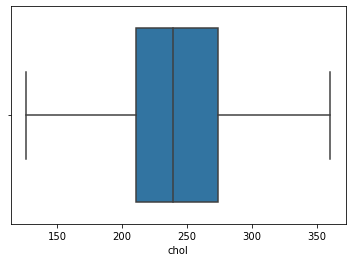

In [4]:
df=df[df["chol"] < upper_limit]
sns.boxplot(df["chol"])

/projects/789aa3e5-de8c-43a9-9498-6199f18e94f7/miniconda3/envs/ds_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trestbps'>

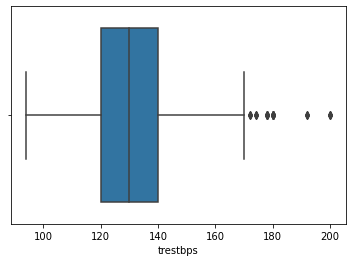

In [7]:
sns.boxplot(df["trestbps"])

In [8]:
q1t = df.trestbps.quantile(0.25)
q3t = df.trestbps.quantile(0.75)
IQR = q3t-q1t

lower_limitt = q1t- (1.5*IQR)
upper_limitt = q3t+ (1.5*IQR)
print("Lower limit for outliers in the column trestbps is " + str(lower_limitt))
print("Upper limit for outliers in the column trestbps is " + str(upper_limitt))

Lower limit for outliers in the column trestbps is 90.0
Upper limit for outliers in the column trestbps is 170.0


/projects/789aa3e5-de8c-43a9-9498-6199f18e94f7/miniconda3/envs/ds_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trestbps'>

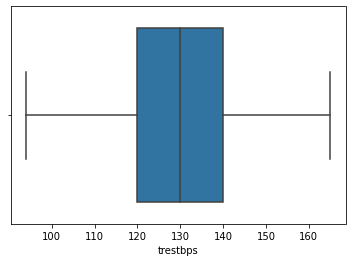

In [9]:
df = df[df['trestbps']< upper_limitt]
df.head()
sns.boxplot(df['trestbps'])

In [10]:
thalach_q1 = df.thalach.quantile(0.25)
thalach_q3 = df.thalach.quantile(0.75)
thalach_IQR = thalach_q3 - thalach_q1
th_lower_limit = thalach_q1 - 1.5 * thalach_IQR
th_upper_limit = thalach_q3 + 1.5 * thalach_IQR
print("Lower limit for outliers in the column thalach is " + str(th_lower_limit))
print("Upper limit for outliers in the column thalach " + str(th_upper_limit))


Lower limit for outliers in the column thalach is 78.0
Upper limit for outliers in the column thalach 222.0


/projects/789aa3e5-de8c-43a9-9498-6199f18e94f7/miniconda3/envs/ds_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalach'>

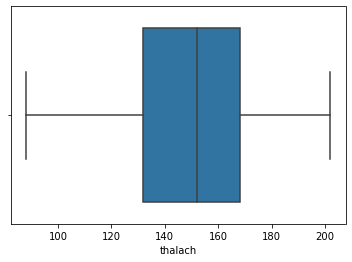

In [11]:
df=df[df["thalach"] > th_lower_limit]
sns.boxplot(df["thalach"])

Lower limit for outliers in the column chol is -2.4000000000000004
Upper limit for outliers in the column chol is 4.0


/projects/789aa3e5-de8c-43a9-9498-6199f18e94f7/miniconda3/envs/ds_env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldpeak'>

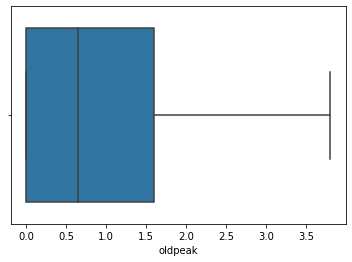

In [12]:
df.oldpeak.describe()
oldpeak_q1 = df.oldpeak.quantile(0.25)
oldpeak_q3 = df.oldpeak.quantile(0.75)
oldpeak_IQR = oldpeak_q3 - oldpeak_q1
oldpeak_lower_limit = oldpeak_q1 - 1.5 * oldpeak_IQR
oldpeak_upper_limit = oldpeak_q3 + 1.5 * oldpeak_IQR
print("Lower limit for outliers in the column chol is " + str(oldpeak_lower_limit))
print("Upper limit for outliers in the column chol is " + str(oldpeak_upper_limit))
df=df[df["oldpeak"] < oldpeak_upper_limit]
sns.boxplot(df["oldpeak"])

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [14]:
y = df["target"]
x = df.drop("target", axis = 1)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 42)

In [16]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [17]:
from sklearn.linear_model import Perceptron #Perceptron 

In [18]:
my_Perceptron_Model = Perceptron(random_state=1, n_jobs = -1, eta0 = 1)
my_Perceptron_Model.fit(x_train, y_train)

Perceptron(eta0=1, n_jobs=-1, random_state=1)

In [19]:
y_hat_Perceptron = my_Perceptron_Model.predict(x_test)

In [20]:
total_squared_error_Perceptron = (np.sum((y_test - y_hat_Perceptron)**2)) #get the sum of all the errors (error = what we want (y_test) - what we predicted (y_hat))
mean_squared_error_Perceptron = total_squared_error_Perceptron/len(y_test) #divide this by how many rows/observations we have 
print(mean_squared_error_Perceptron)

0.17989417989417988


<AxesSubplot:>

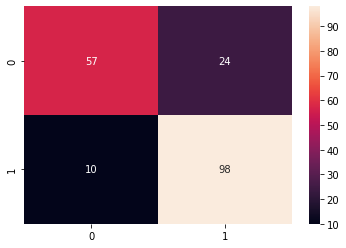

In [23]:
sns.heatmap(confusion_matrix(y_test, y_hat_Perceptron), annot=True, fmt='g')

**Metrics:**

Precision: 0.9629629629629629 |
Recall: 0.975 |
F1: 0.9689440993788819 |
Accuracy: 97.35449735449735% |
MSE: 0.026455026455026454



